In [3]:
!pip install pandas 
import pandas as pd 
# pandas is a software library written for the Python programming language for data manipulation and analysis.
# In this code we use it to show scatter plots. 

from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col
from pyspark.sql import SQLContext
from pyspark import SparkContext

SparkContext.getOrCreate()
sc = SparkContext.getOrCreate("ch6")
sqlCtx = SQLContext(sc)

In [4]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

Boston Housing dataset
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

### Convert all columns to double type 

In [5]:
boston_housing = sqlCtx.read.option('header','true').options(delimiter=",").csv('BostonHousing.csv')
boston_housing.show()
print(boston_housing.dtypes)
for _ in boston_housing.columns:
    boston_housing = boston_housing.withColumn(_,col(_).cast(DoubleType()))
print(boston_housing.dtypes)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|  18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|  24|
|0.02731|   0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729|   0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237|   0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905|   0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985|   0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172|96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631| 100|6.0821|  5|311|   15.2|386.63|29.9

### Create features column with all of the columns to make a correlation matrix. 

In [44]:
featureAssembler = VectorAssembler(inputCols = boston_housing.columns , outputCol='features')
features_dataframe = featureAssembler.transform(boston_housing).select(['features'])
features_dataframe.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                |
+----------------------------------------------------------------------------------------------------------------------------------------+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0,43.230625,24.800400000000003,32.743500000000004]            |
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6,41.229241,83.53960000000001,58.687940000000005]            |
|[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,51.624224999999996,16.240900000000003,28.95555]           |
|[0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,48.972004000000005,8.6436,20.57412]                       |
|[0.06905,0.0,2.18,0.0,0.45

### Compute the correlation matrix for the input dataset of Vectors using the specified method
### Method : pearson (default)

https://www.google.com/search?q=pearson+correlation&oq=pearson+&aqs=edge.1.69i57j0i67l6j0i512l2.3941j0j1&sourceid=chrome&ie=UTF-8

### Section 2

Select the top three variables based on the pairwise correlations of the variables; 

In [7]:
pearsonCorr = Correlation.corr(features_dataframe, 'features', 'pearson').collect()[0][0]
print(pearsonCorr) # Show up the correlation matrix

for i in boston_housing.columns: # calculation of correlation value for each column in pair of medv
    print( "Correlation to MV for ", i, boston_housing.stat.corr('medv',i))

DenseMatrix([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
              -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,  0.58276431,
               0.28994558, -0.38506394,  0.45562148, -0.38830461],
             [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371,
               0.31199059, -0.56953734,  0.66440822, -0.31194783, -0.31456332,
              -0.39167855,  0.17552032, -0.41299457,  0.36044534],
             [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145,
              -0.39167585,  0.64477851, -0.70802699,  0.59512927,  0.72076018,
               0.38324756, -0.35697654,  0.60379972, -0.48372516],
             [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281,
               0.09125123,  0.08651777, -0.09917578, -0.00736824, -0.03558652,
              -0.12151517,  0.04878848, -0.0539293 ,  0.17526018],
             [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ,
              -0.3021

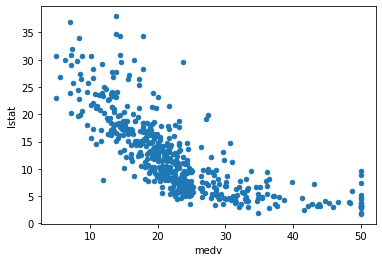

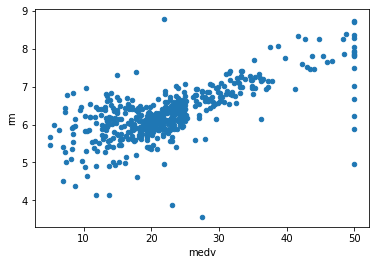

In [40]:
import pandas as pd
import numpy as np
# In this cell we convert pyspark dataframe to pandas to simply show the scatter plot.
sampled_data = boston_housing.select(['lstat', 'rm', 'medv']).toPandas()

ax1 = sampled_data.plot.scatter(x='medv', y='lstat')
ax2 = sampled_data.plot.scatter(x='medv', y='rm')


***The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median value (MEDV) tends to go up when the number of rooms (RM) goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; the median value (MEDV) tends to go down when the percentage of the lower status of the population (LSTAT) goes up.***

### Section 3
Create a regression model using a polynomial function of degree two on the three selected variables. Use 70% of the data for training;

y = a * x^2 + b * x + c

24 = a * 43.230 + b * 6.575 + c

In [59]:
boston_housing = boston_housing.withColumn("lstat2", col("lstat")*col("lstat"))
boston_housing = boston_housing.withColumn("rm2", col("rm")*col("rm"))

rmAssembler = VectorAssembler(inputCols = ['rm', 'rm2'] , outputCol='rm_features')
lstatAssembler = VectorAssembler(inputCols = ['lstat', 'lstat2'] , outputCol='lstat_features')

df_rm = rmAssembler.transform(boston_housing).select(['medv', 'rm_features'])
df_lstat = lstatAssembler.transform(boston_housing).select(['medv', 'lstat_features'])

df_rm.show()
df_lstat.show()

df_training_lstat, df_test_lstat = df_lstat.randomSplit([0.7, 0.3])
df_training_rm, df_test_rm = df_rm.randomSplit([0.7, 0.3])


+----+--------------------+
|medv|         rm_features|
+----+--------------------+
|24.0|   [6.575,43.230625]|
|21.6|   [6.421,41.229241]|
|34.7|[7.185,51.6242249...|
|33.4|[6.998,48.9720040...|
|36.2|[7.147,51.0796090...|
|28.7|[6.43,41.34489999...|
|22.9|   [6.012,36.144144]|
|27.1|   [6.172,38.093584]|
|16.5|[5.631,31.7081610...|
|18.9|   [6.004,36.048016]|
|15.0|   [6.377,40.666129]|
|18.9|[6.009,36.1080810...|
|21.7|   [5.889,34.680321]|
|20.4|   [5.949,35.390601]|
|18.2|   [6.096,37.161216]|
|19.9|[5.834,34.0355559...|
|23.1|   [5.935,35.224225]|
|17.5|[5.99,35.88010000...|
|20.2|[5.456,29.7679360...|
|18.2|   [5.727,32.798529]|
+----+--------------------+
only showing top 20 rows

+----+--------------------+
|medv|      lstat_features|
+----+--------------------+
|24.0|[4.98,24.80040000...|
|21.6|[9.14,83.53960000...|
|34.7|[4.03,16.24090000...|
|33.4|       [2.94,8.6436]|
|36.2|      [5.33,28.4089]|
|28.7|[5.21,27.14409999...|
|22.9|    [12.43,154.5049]|
|27.1|[19.15,366.72249

#### Create a regression model
maxIter : It is the maximum number of iterations to perform before giving up.

In [67]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

pr = LinearRegression(featuresCol="lstat_features", labelCol="medv", maxIter=30)
prModel = pr.fit(df_training_lstat)


print("Coefficients: " + str(prModel.coefficients))
print("Intercept: " + str(prModel.intercept)) # Describe Intercept 

print("r2:", prModel.summary.r2)

Coefficients: [-2.2351180521255425,0.04157823991747413]
Intercept: 42.08551735603595
r2: 0.6449056821423346


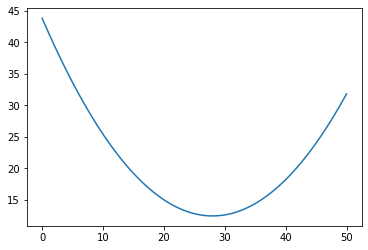

In [63]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 50, 100)
fx = []
for i in range(len(x)):
    fx.append(0.04*x[i]*x[i] - 2.24*x[i] + 43.78)
plt.plot(x, fx)
plt.show()

***R squared at 0.65 indicates that in our model, approximate 65% of the variability in “MV” can be explained using the model.***

### Compute the R-Squared value of the model using the remaining 30% of the test data

In [71]:
pr_predictions = prModel.transform(df_test_lstat)
pr_predictions.show()

pr_predictions.select("prediction", "medv", "lstat_features").show(5)

pr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="medv",metricName="r2")

print("R2 on test data:", pr_evaluator.evaluate(pr_predictions))


+----+--------------------+------------------+
|medv|      lstat_features|        prediction|
+----+--------------------+------------------+
| 5.0|    [22.98,528.0804]|12.679158085106685|
| 5.0|    [30.59,935.7481]|12.620015145636174|
| 5.6|    [26.77,716.6329]|12.047741749590418|
| 7.2|    [30.81,949.2561]|12.689928038973797|
| 8.4|[22.74,517.107599...|12.759356706650355|
| 8.7|    [26.45,699.6025]|12.054885469180046|
| 9.5|[24.08,579.846399...| 12.37286739533656|
| 9.6|    [18.05,325.8025]|15.287931025882774|
|10.2|    [15.69,246.1761]|17.252084065934294|
|10.2|[30.62,937.584400...|12.629311726032867|
|10.4|[17.21,296.184100...| 15.93394924849651|
|10.5|[22.11,488.852099...|12.992667121501256|
|10.5|    [28.28,799.7584]|12.128925473140846|
|11.7|    [15.17,230.1289]|17.747131121435885|
|11.9|    [23.34,544.7556]|12.567841052613357|
|12.1|[20.31,412.496099...|13.841131528188583|
|12.5|    [19.37,375.1969]| 14.39130741085674|
|12.6|[16.44,270.273600...| 16.57767716325147|
|12.7|[16.35,

**Sure enough, we achieved worse R squared on the test set.**